In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Display all the column of the dataframes
pd.pandas.set_option('display.max_columns',None)

In [14]:
dataset=sns.load_dataset("titanic")


In [15]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
dataset.shape

(891, 15)

In [29]:
dataset.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
[features for features in dataset.columns]

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [18]:
features_with_nan = [features for features in dataset.columns if dataset[features].isnull().sum()>=1]

In [19]:
## features of the nan values
features_with_nan

['age', 'embarked', 'deck', 'embark_town']

In [23]:
for features in features_with_nan:
    print(features,np.round(dataset[features].isnull().mean(),4), '% missing values')

age 0.1987 % missing values
embarked 0.0022 % missing values
deck 0.7722 % missing values
embark_town 0.0022 % missing values


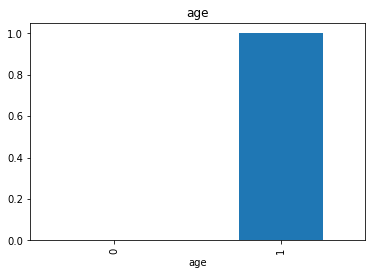

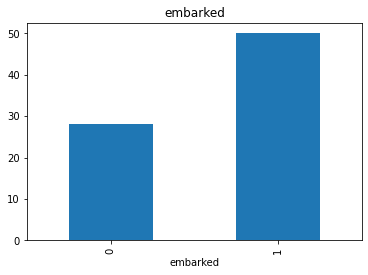

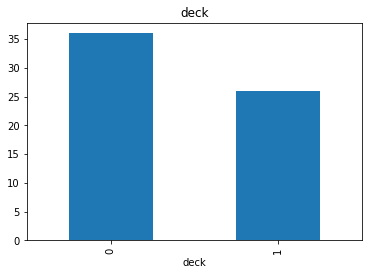

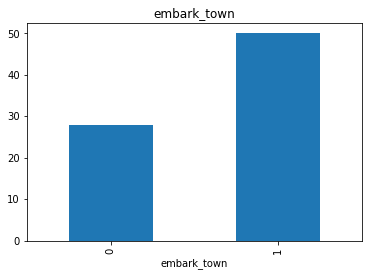

In [38]:
for features in features_with_nan:
    data = dataset.copy()
    ## let's make a variable that indicate 1 if the obs was missing or 0 othervise
    data[features] = np.where(data[features].isnull(),1,0)
    
    ## lets calculate the mean saleprice where the information is missing or present
    data.groupby(features)['age'].median().plot.bar()
    plt.title(features)
    plt.show()
    
    ## 1 is indecate the missing value
    ## 0 is not indicater the missing value

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

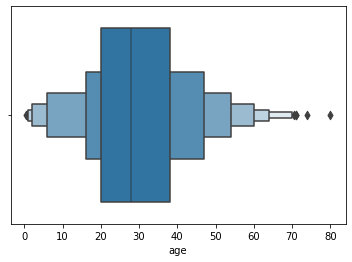

In [39]:
sns.boxenplot(dataset['age'])

In [49]:
dataset["age"].dtypes!='object'   ## o is object

True

In [50]:
dataset["alive"].dtypes!='object'

False

In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [63]:
numerical_features = [features for features in dataset.columns if dataset[features].dtypes!='object']

In [64]:
print(len(numerical_features))

10


In [65]:
dataset[numerical_features].head()

,survived,pclass,age,sibsp,parch,fare,class,adult_male,deck,alone
0,0,3,22.0,1,0,7.2500,Third,True,NaN,False
1,1,1,38.0,1,0,71.2833,First,False,C,False
2,1,3,26.0,0,0,7.9250,Third,False,NaN,True
3,1,1,35.0,1,0,53.1000,First,False,C,False
4,0,3,35.0,0,0,8.0500,Third,True,NaN,True


In [58]:
dataset[numerical_features].shape

(891, 10)

## feature engineering